In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/LEPP2018.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                 85.30%
-RA                5.22%
BR                 1.67%
FG                 1.38%
RA                 0.97%
BCFG               0.61%
-RA BR             0.36%
VCFG               0.32%
BR BCFG            0.31%
FZFG               0.27%
VCTS               0.25%
TS                 0.24%
RA BR              0.23%
-SHRA              0.23%
-TSRA              0.21%
-SN                0.21%
-DZ                0.20%
-UP                0.20%
SHRA               0.18%
SN                 0.16%
TSRA               0.10%
VCSH               0.07%
-DZ BR             0.07%
BCFG BR            0.07%
TS SHRA            0.06%
+RA                0.06%
-SNRA              0.06%
UP                 0.06%
TS -SHRA           0.05%
RASN               0.05%
SN FZFG            0.05%
+SHRA              0.04%
BR -RA             0.04%
-RA FG             0.04%
BR VCFG            0.03%
-SN FZFG           0.03%
-FZUP BR           0.03%
VCTS -SHRA         0.03%
DZ                 0.03%
-UP BR             0.03%


In [4]:
#label sn

station["sn_l"] = "No SN"
mask = station['wxcodes_o'].str.contains("SN")
station.loc[mask,["sn_l"]] = "SN"


print(station.sample(50))
print("*****************************")
station["sn_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o   sn_l
time                                
2018-06-06 04:30:00         M  No SN
2018-11-18 08:30:00         M  No SN
2018-02-02 05:30:00         M  No SN
2018-10-19 19:30:00         M  No SN
2018-09-23 04:30:00         M  No SN
2018-08-30 23:30:00         M  No SN
2018-07-30 08:30:00         M  No SN
2018-08-27 22:00:00         M  No SN
2018-02-01 18:00:00         M  No SN
2018-01-08 20:30:00         M  No SN
2018-08-17 13:30:00         M  No SN
2018-09-16 22:30:00         M  No SN
2018-05-28 17:30:00         M  No SN
2018-02-16 12:30:00         M  No SN
2018-07-06 14:00:00         M  No SN
2018-05-18 11:00:00         M  No SN
2018-05-11 16:00:00         M  No SN
2018-03-24 22:30:00       -RA  No SN
2018-11-26 02:30:00       -RA  No SN
2018-07-31 22:30:00         M  No SN
2018-12-24 13:00:00         M  No SN
2018-01-31 08:00:00      FZFG  No SN
2018-04-05 03:00:00         M  No SN
2018-05-24 19:30:00         M  No SN
2018-11-21 17:30:00         M  No SN
2

No SN    99%
SN        1%
Name: sn_l, dtype: object

**Forecast D0**

In [5]:
#Forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/lat42.77lon-1.647p3R12KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,0,292.052490,0.0,553.941833,0.587827,0.958378,102771.531250,274.759369,0.946349,24224.912109,...,0.0,-0.001094,0.00,0.0,0.0,0.00,5483.839844,1544.834961,244.594223,272.421326
2018-01-01 02:00:00,1,196.488373,0.0,613.525208,1.296904,11.657522,102834.796875,274.350494,0.946008,24224.343750,...,0.0,0.001953,0.00,0.0,0.0,0.00,5499.091797,1549.441040,245.285736,272.807495
2018-01-01 03:00:00,2,186.363007,0.0,661.109863,4.245080,5.900322,102882.640625,274.785828,0.914341,24221.205078,...,0.0,-0.004102,0.00,0.0,0.0,0.00,5511.755859,1552.350952,245.793243,273.134460
2018-01-01 04:00:00,3,189.292435,0.0,694.456299,4.445677,5.976796,102938.546875,275.039307,0.902506,24219.220703,...,0.0,-0.002734,0.00,0.0,0.0,0.00,5524.407227,1558.574951,246.264526,273.393463
2018-01-01 05:00:00,4,194.010376,0.0,726.301025,4.055670,5.694401,102932.867188,275.172119,0.895605,24218.425781,...,0.0,0.001211,0.00,0.0,0.0,0.00,5532.286133,1559.514038,246.827194,273.539368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,8390,1.414751,0.0,1970.248535,6.084242,7.562932,103258.039062,280.895203,0.730230,24041.951172,...,0.0,0.001211,0.30,0.0,0.0,0.30,5738.210938,1633.965942,256.457489,283.896637
2018-12-31 20:00:00,8391,356.427704,0.0,1936.104858,5.687714,7.142657,103287.882812,280.499054,0.743425,24041.025391,...,0.0,-0.000898,0.20,0.0,0.0,0.20,5739.144043,1634.055054,256.369995,283.659424
2018-12-31 21:00:00,8392,352.389984,0.0,1902.936279,5.291308,6.723206,103340.562500,280.019501,0.756728,24041.576172,...,0.0,-0.003398,0.14,0.0,0.0,0.14,5741.472168,1636.801025,256.276123,283.307068


In [6]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(20)

,sn_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-02-25 09:00:00,No SN,348.155701,0.0,778.372314,4.338738,6.790452,101335.960938,276.642548,0.674935,24216.695312,...,0.000000,-0.002617,0.000000,0.000000,0.000000,0.000000,5461.875000,1421.910034,248.548950,274.971649
2018-02-01 05:00:00,No SN,255.617889,0.0,841.746155,2.233802,9.175924,101473.609375,278.242950,0.920618,24218.419922,...,0.000000,0.004961,0.281250,0.617188,0.468750,0.617188,5460.003906,1442.339966,251.369919,273.519348
2018-01-18 08:00:00,No SN,114.482635,0.0,1301.615112,1.596881,1.717831,102773.453125,274.882416,0.983295,216.620377,...,0.000000,-0.000008,0.265625,1.000000,0.000000,1.000000,5634.727051,1543.850952,256.531219,277.644989
2018-01-26 10:00:00,No SN,334.538269,0.0,329.750366,7.676082,13.767660,102040.328125,278.736298,0.894195,23417.060547,...,91.949997,-0.156406,0.000000,0.296875,0.109375,0.296875,5409.792969,1483.483032,241.977417,271.554382
2018-10-08 05:00:00,No SN,345.363098,0.0,1487.933350,3.691889,5.800994,101929.640625,283.355499,0.939281,24217.072266,...,2.800000,-0.187930,0.000000,0.400000,0.000000,0.400000,5584.250000,1505.682007,254.281174,278.600006
2018-03-31 11:00:00,No SN,302.957092,0.0,299.443207,10.916096,15.338415,101061.882812,280.598572,0.711729,24216.150391,...,137.270004,-0.001289,0.000000,0.000000,0.000000,0.000000,5327.246094,1398.447998,241.860123,270.784790
2018-05-06 09:00:00,No SN,224.915207,0.0,1979.963989,0.522583,0.595085,101976.351562,287.721252,0.693477,24214.082031,...,0.000000,-0.003984,0.000000,0.000000,0.000000,0.000000,5654.810059,1530.457031,257.234009,282.613708
2018-06-26 01:00:00,No SN,30.339973,0.0,3027.772949,3.366171,5.136161,101961.773438,285.692810,0.946310,24036.865234,...,0.000000,-0.006875,0.000000,0.000000,0.000000,0.000000,5804.923828,1548.541992,263.686157,291.436066
2018-12-09 17:00:00,No SN,312.823425,0.0,1399.557129,5.218876,11.127645,103100.101562,282.368835,0.927918,24212.423828,...,17.110001,-0.133711,0.109375,0.796875,0.000000,0.796875,5692.274902,1600.650024,256.198395,275.341827


**Scatter plot significant meteorological variables and sn_l**

No SN    498
SN         2
Name: sn_l, dtype: int64

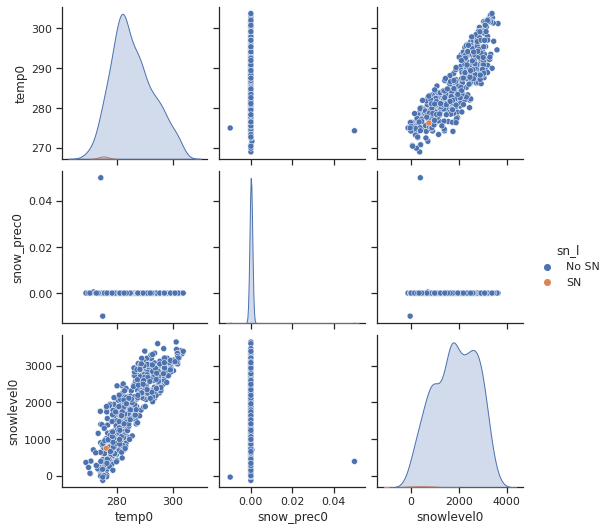

In [19]:
import seaborn as sns
np.random.seed(1)
sns.set_theme(style="ticks")
df = df_all1k[["sn_l","temp0","snow_prec0","snowlevel0"]].sample(500)
sns.pairplot(df, hue="sn_l");
df["sn_l"].value_counts()

In [20]:
import plotly.express as px

fig = px.scatter_3d(df, x='temp0', y='snow_prec0', z='snowlevel0', color='sn_l')
fig.show()

**Scatter plot 3 PCA variables and sn_l**

No SN    8277
SN         51
Name: sn_l, dtype: int64

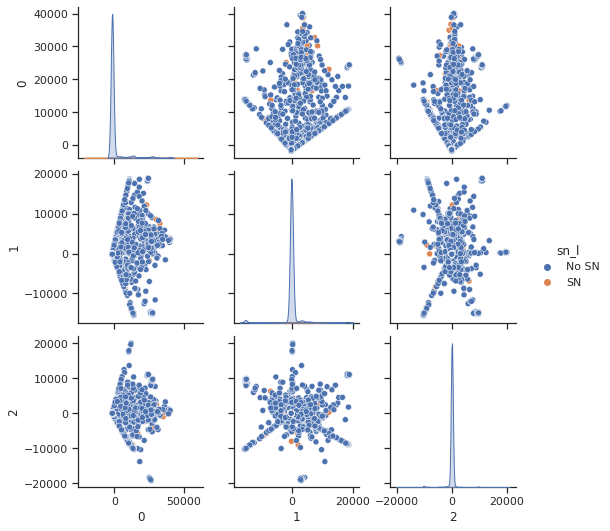

In [21]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["sn_l"] = df_all1k.sn_l

sns.pairplot(df_pca, hue="sn_l");
df_pca["sn_l"].value_counts()

**Meteorological model score Heidke Skill Score (HSS)**

In [22]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["SN" if c>0 else "No SN" for c in df_all1k.snow_prec0])
concat = pd.DataFrame({"y_pred":y_pred, "sn_l":df_all1k.sn_l})
cm = pd.crosstab(concat.sn_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.sn_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["SN" if c>0 else "No SN" for c in df_all1k.snow_prec1])
concat = pd.DataFrame({"y_pred":y_pred, "sn_l":df_all1k.sn_l})
cm = pd.crosstab(concat.sn_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.sn_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred  No SN  SN   All
sn_l                   
No SN    8256  21  8277
SN         36  15    51
All      8292  36  8328
Heidke Skill Score: 0.34

Quality report Meteorological model point 0
              precision    recall  f1-score      support
No SN          0.995658  0.997463  0.996560  8277.000000
SN             0.416667  0.294118  0.344828    51.000000
accuracy       0.993156  0.993156  0.993156     0.993156
macro avg      0.706163  0.645790  0.670694  8328.000000
weighted avg   0.992113  0.993156  0.992569  8328.000000

HSS point 1
y_pred  No SN  SN   All
sn_l                   
No SN    8253  24  8277
SN         36  15    51
All      8289  39  8328
Heidke Skill Score: 0.33

Quality report Meteorological model point 1
              precision    recall  f1-score      support
No SN          0.995657  0.997100  0.996378  8277.000000
SN             0.384615  0.294118  0.333333    51.000000
accuracy       0.992795  0.992795  0.992795     0.992795
macro avg      0.690136  

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [24]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between meteorological model forecast and observed values")
else:
    print("Retain H0,There is no association between meteorological model forecast and observed values")


p-value: 3.1985756484237527e-189
Significance level: 0.01
Degres of of freedom:  1
Stadistic 860.8399460473265
Reject H0,There is an association between meteorological model forecast and observed values


In [26]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


In [27]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.90,0.85,None,0.94,0.07
LabelPropagation,0.99,0.70,None,0.99,2.28
LabelSpreading,0.99,0.70,None,0.99,4.61
DecisionTreeClassifier,0.99,0.70,None,0.99,0.30
KNeighborsClassifier,0.99,0.65,None,0.99,0.23
LGBMClassifier,0.99,0.65,None,0.99,2.18
SGDClassifier,0.99,0.65,None,0.99,0.15
PassiveAggressiveClassifier,0.98,0.64,None,0.98,0.11
BernoulliNB,0.85,0.63,None,0.92,0.10


**ML LGBMClassifier**

In [28]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502'],
      dtype='object')


Confusion matrix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1654   3  1657
SN         3   6     9
All     1657   9  1666
Heidke Skill Score: 0.66

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1657.00
SN                 0.67    0.67      0.67     9.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.83    0.83      0.83  1666.00
weighted avg       1.00    1.00      1.00  1666.00

Confusion matrix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1660   3  1663
SN         0   3     3
All     1660   6  1666
Heidke Skill Score: 0.67

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1663.00
SN                 0.50    1.00      0.67     3.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.75    1.00      0.83  1666.00
weighted 

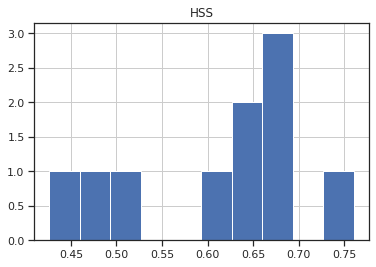

In [29]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.34) and at point 1 (0.33). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [30]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.34, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.66 0.67 0.61 0.51 0.76 0.47 0.63 0.69 0.43 0.63]

p_value point 0: 9.894886042488144e-06

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [31]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [33]:
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.45it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.91,0.95,None,0.95,0.07
BernoulliNB,0.83,0.85,None,0.90,0.10
NearestCentroid,0.97,0.81,None,0.98,0.10
LGBMClassifier,0.99,0.75,None,0.99,1.20
LabelSpreading,0.99,0.75,None,0.99,4.07
LabelPropagation,0.99,0.75,None,0.99,2.49
AdaBoostClassifier,1.00,0.71,None,0.99,3.38
SGDClassifier,0.99,0.71,None,0.99,0.12
DecisionTreeClassifier,0.99,0.71,None,0.99,0.51


In [34]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1653   4  1657
SN         2   7     9
All     1655  11  1666
Heidke Skill Score: 0.7

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1657.00
SN                 0.64    0.78      0.70     9.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.82    0.89      0.85  1666.00
weighted avg       1.00    1.00      1.00  1666.00

Confusion marix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1661   2  1663
SN         0   3     3
All     1661   5  1666
Heidke Skill Score: 0.75

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1663.00
SN                 0.60    1.00      0.75     3.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.80    1.00      0.87  1666.00
weighted avg

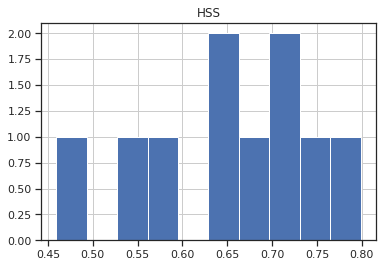

In [35]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [36]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.665 0.666 0.612 0.515 0.76  0.473 0.634 0.69  0.426 0.634]

HSS with time variables: [0.698 0.749 0.694 0.557 0.799 0.569 0.634 0.718 0.459 0.634]

alpha:  0.01

p_value point:  0.0012831427141632903

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


****

**Save Machine learning model**

In [37]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("sn_lepp_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2746    193  2939
RA/DZ          104    251   355
All           2850    444  3294
Heidke Skill Score: 0.58

Quality report (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.96    0.93      0.95  2939.00
RA/DZ              0.57    0.71      0.63   355.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.76    0.82      0.79  3294.00
weighted avg       0.92    0.91      0.91  3294.00

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2706    197  2903
RA/DZ          100    291   391
All           2806    488  3294
Heidke Skill Score: 0.61

Quality report (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.96    0.93      0.95  2903.00
RA/DZ              0.60    0.74      0.66   391.00
accuracy           0.91

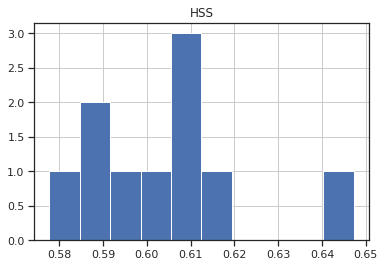

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [ ]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.519 0.56  0.519 0.567 0.568 0.559 0.579 0.522 0.515 0.558]

HSS with ExtraTreesClassifier: [0.578 0.611 0.586 0.61  0.647 0.616 0.589 0.596 0.604 0.609]

alpha:  0.01

p_value point:  7.836755176715589e-06

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
